<a href="https://colab.research.google.com/github/Minakshi654/Modelname/blob/main/CPU%20Utilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import warnings
import numpy as np

In [10]:
data2023 = pd.read_csv("/content/CPU_Utilization_2023_Data.csv")

In [11]:
data2024 = pd.read_csv("/content/CPU_Utilization_2024_Data.csv")

In [12]:
df_merged = pd.concat([data2023, data2024], ignore_index=True)

In [16]:
df_merged.shape

(973813, 3)

In [15]:
df_merged.describe()

,[xBackground__],[xInteractive__]
count,973813.000000,973813.000000
mean,0.109621,0.094052
std,0.053882,0.138902
min,0.000000,0.000000
25%,0.077682,0.002500
50%,0.095789,0.033041
75%,0.123733,0.134577
max,0.680833,1.702700


In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973813 entries, 0 to 973812
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TimePoints[TimePoint]  973813 non-null  object 
 1   [xBackground__]        973813 non-null  float64
 2   [xInteractive__]       973813 non-null  float64
dtypes: float64(2), object(1)
memory usage: 22.3+ MB


In [18]:
df_merged [' total'] = df_merged ['[xBackground__]'] + df_merged ['[xInteractive__]']

In [19]:
df_merged.head()

,TimePoints[TimePoint],[xBackground__],[xInteractive__],total
0,14/04/2023 00:00:00,0.000138,0.0,0.000138
1,14/04/2023 00:00:30,0.000138,0.0,0.000138
2,14/04/2023 00:01:00,0.000138,0.0,0.000138
3,14/04/2023 00:01:30,0.000138,0.0,0.000138
4,14/04/2023 00:02:00,0.000138,0.0,0.000138


In [21]:
import pandas as pd

# Assuming your original DataFrame is named "df_merged"
# Convert the "TimePoints[TimePoint]" column to datetime
df_merged['TimePoints[TimePoint]'] = pd.to_datetime(df_merged['TimePoints[TimePoint]'], format='%d/%m/%Y %H:%M:%S')

# Group by 10-minute intervals and calculate the maximum "total" value
grouped = df_merged.groupby(pd.Grouper(key='TimePoints[TimePoint]', freq='10Min'))[' total'].max()

# Create a new DataFrame with the grouped intervals and maximum values
result_df = pd.DataFrame({
    'Interval Start': grouped.index,
    'Max Total': grouped.values
})

# Save the result to a CSV file
result_df.to_csv('grouped_intervals.csv', index=False)

# Print the first few rows of the result DataFrame
print(result_df.head())


       Interval Start  Max Total
0 2023-04-14 00:00:00   0.000138
1 2023-04-14 00:10:00   0.000138
2 2023-04-14 00:20:00   0.051037
3 2023-04-14 00:30:00   0.042937
4 2023-04-14 00:40:00   0.031671


In [22]:
grouped_intervals = pd.read_csv("/content/grouped_intervals.csv")

In [23]:
grouped_intervals.head()

,Interval Start,Max Total
0,2023-04-14 00:00:00,0.000138
1,2023-04-14 00:10:00,0.000138
2,2023-04-14 00:20:00,0.051037
3,2023-04-14 00:30:00,0.042937
4,2023-04-14 00:40:00,0.031671


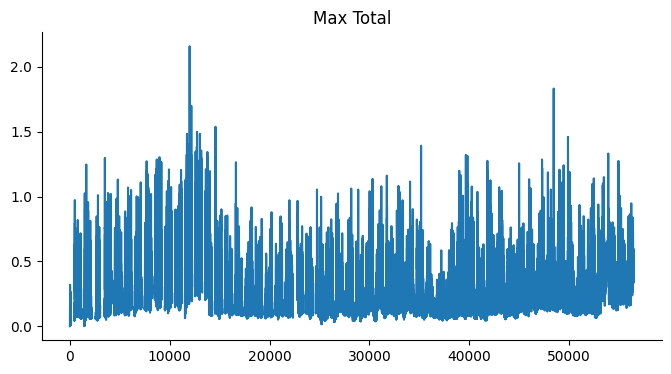

In [27]:
# @title Max Total

from matplotlib import pyplot as plt
grouped_intervals['Max Total'].plot(kind='line', figsize=(8, 4), title='Max Total')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
grouped_intervals.shape

(56448, 2)

In [25]:
result_df['Status'] = result_df['Max Total'].apply(lambda x: 'Overflow' if x >= 1 else 'Normal')

# Print the updated DataFrame
print(result_df.head())

       Interval Start  Max Total  Status
0 2023-04-14 00:00:00   0.000138  Normal
1 2023-04-14 00:10:00   0.000138  Normal
2 2023-04-14 00:20:00   0.051037  Normal
3 2023-04-14 00:30:00   0.042937  Normal
4 2023-04-14 00:40:00   0.031671  Normal


In [26]:
result_df.to_csv('grouped_intervals_with_status.csv', index=False)

In [28]:
num_overflows = (result_df['Max Total'] >= 1).sum()
print(f"Total number of overflows: {num_overflows}")

Total number of overflows: 593


In [29]:
# Create a new DataFrame with overflow rows
overflow_df = result_df[result_df['Max Total'] >= 1]

# Save the overflow rows to a CSV file
overflow_df.to_csv('overflow_intervals.csv', index=False)

print("Overflow rows saved to 'overflow_intervals.csv'")

Overflow rows saved to 'overflow_intervals.csv'


In [30]:
overflow_intervals = pd.read_csv("/content/overflow_intervals.csv")

In [31]:
overflow_intervals.head()

,Interval Start,Max Total,Status
0,2023-04-24 08:00:00,1.025500,Overflow
1,2023-04-25 09:10:00,1.247104,Overflow
2,2023-05-03 12:30:00,1.011079,Overflow
3,2023-05-08 07:30:00,1.298292,Overflow
4,2023-05-08 07:40:00,1.170842,Overflow


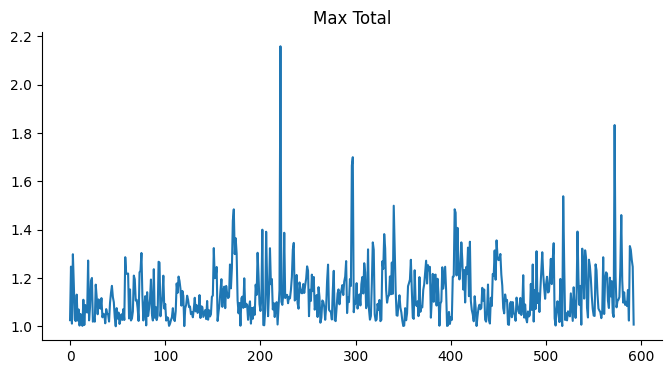

In [32]:
# @title Max Total

from matplotlib import pyplot as plt
overflow_intervals['Max Total'].plot(kind='line', figsize=(8, 4), title='Max Total')
plt.gca().spines[['top', 'right']].set_visible(False)

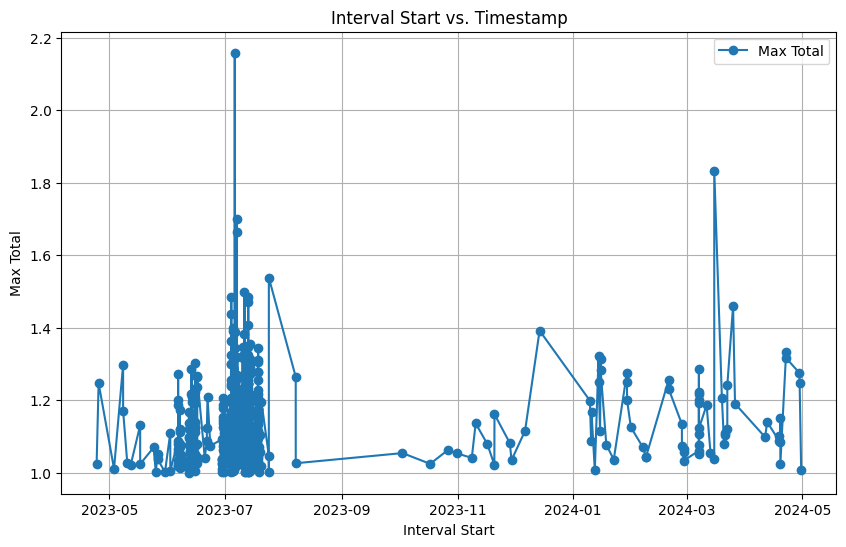

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "result_df" DataFrame from the previous steps
# Convert the "TimePoints[TimePoint]" column to datetime
overflow_intervals['Interval Start'] = pd.to_datetime(overflow_intervals['Interval Start'], format='%Y-%m-%d %H:%M:%S')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(overflow_intervals['Interval Start'], overflow_intervals['Max Total'], marker='o', label='Max Total')
plt.xlabel('Interval Start')
plt.ylabel('Max Total')
plt.title('Interval Start vs. Timestamp')
plt.grid(True)
plt.legend()
plt.show()
